In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

**Load Processed Data**

In [2]:
train_df=pd.read_csv('../data/processed/train_baseline.csv')
val_df=pd.read_csv('../data/processed/val_baseline.csv')

train_df.head()

,text,label
0,trying make plan recently keep thing come unde...,1
1,want cut bad think right normally get urge pun...,2
2,lot people life friend family love one cannot ...,2
3,shiba,1
4,original original end end angry every hour fea...,0


**Remove Empty or whitespace-only rows**

In [8]:
#Remove NaN Texts
train_df=train_df.dropna(subset=['text'])
val_df=val_df.dropna(subset=['text'])

#Remove empty/whitespace-onlly texts
train_df=train_df[train_df['text'].str.strip() != ""]
val_df=val_df[val_df['text'].str.strip() != ""]

#Reset index
train_df=train_df.reset_index(drop=True)
val_df=val_df.reset_index(drop=True)


**Split Features and labels**

In [9]:
X_train=train_df['text']
y_train=train_df['label']

X_val=val_df['text']
y_val=val_df['label']

Check Nan

In [10]:
X_train.isna().sum(), X_val.isna().sum()


(np.int64(0), np.int64(0))

In [11]:
(X_train.str.strip() == "").sum()
(X_val.str.strip() == "").sum()


np.int64(0)

**TF-IDF Vectorization**

In [12]:
tfidf= TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,2),
    min_df=2
)

X_train_tfidf=tfidf.fit_transform(X_train)
X_val_tfidf=tfidf.transform(X_val)

**Handle Class Imbalance**

In [13]:
classes=np.unique(y_train)

class_weights_array= compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

class_weights=dict(zip(classes, class_weights_array))
class_weights

{np.int64(0): np.float64(1.9535586444144857),
 np.int64(1): np.float64(0.46303784915431656),
 np.int64(2): np.float64(0.48739836926895463),
 np.int64(3): np.float64(0.7048591891846558),
 np.int64(4): np.float64(2.902942801878972),
 np.int64(5): np.float64(2.702965202289831),
 np.int64(6): np.float64(6.964368578057673)}

**Train Logistic Regression Model**

In [14]:
baseline_model=LogisticRegression(
    max_iter=1000,
    class_weight=class_weights,
    n_jobs=-1
)

baseline_model.fit(X_train_tfidf,y_train)

LogisticRegression(class_weight={np.int64(0): np.float64(1.9535586444144857),
                                 np.int64(1): np.float64(0.46303784915431656),
                                 np.int64(2): np.float64(0.48739836926895463),
                                 np.int64(3): np.float64(0.7048591891846558),
                                 np.int64(4): np.float64(2.902942801878972),
                                 np.int64(5): np.float64(2.702965202289831),
                                 np.int64(6): np.float64(6.964368578057673)},
                   max_iter=1000, n_jobs=-1)

**Validation Prediction**

In [15]:
y_pred=baseline_model.predict(X_val_tfidf)

**Evaluation Metrics**

In [16]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       768
           1       0.88      0.91      0.90      3241
           2       0.78      0.62      0.69      3078
           3       0.65      0.70      0.68      2131
           4       0.51      0.68      0.58       517
           5       0.78      0.82      0.80       556
           6       0.56      0.79      0.66       215

    accuracy                           0.76     10506
   macro avg       0.70      0.76      0.73     10506
weighted avg       0.77      0.76      0.76     10506



**Confusion Matrix**

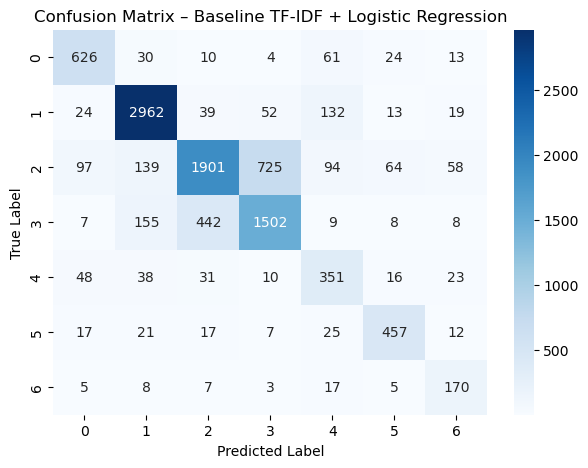

In [17]:
cm=confusion_matrix(y_val,y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix – Baseline TF-IDF + Logistic Regression")
plt.show()

**Save Baseline Model & Vectorizer**

In [18]:
import joblib

joblib.dump(baseline_model, "../models/baseline_logreg.pkl")
joblib.dump(tfidf, "../models/tfidf_vectorizer.pkl")

['../models/tfidf_vectorizer.pkl']